**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: ALEJANDRA BERENICE VEGA LOPEZ
*   MATRÍCULA: A01795415

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/CyA_De_Datos/Modulo_4"
os.chdir(DIR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [5]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [6]:
#Indormación del DF
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Determinando la cantidad de valores únicos por columna
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
# Estadísticas descriptivas de las variables numéricas
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
# Estadísticas descriptivas de las variables de texto
insurance_df.describe(include = 'object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


Como podemos ver en el heat map anterior, no se aprecia ninguna aparente relacion entre las variables numéricas

1b) Búsqueda de valores faltantes.

In [10]:
# A continuación se calculan los valores faltantes
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

In [11]:
# Se hace una lista de variables numéricas y otra de categóricas.
num_cols = insurance_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = insurance_df.select_dtypes(exclude=np.number).columns.tolist()

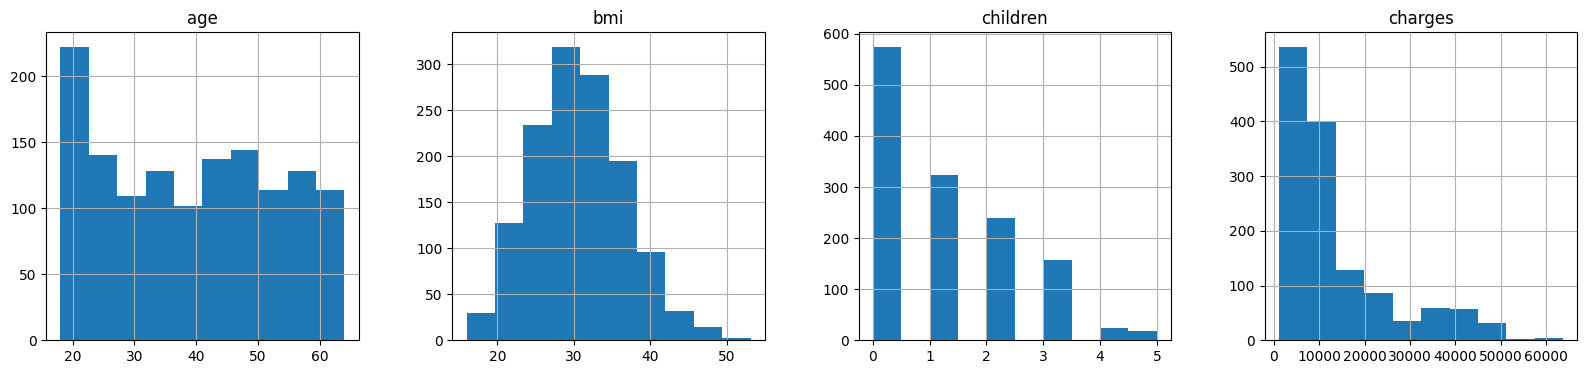

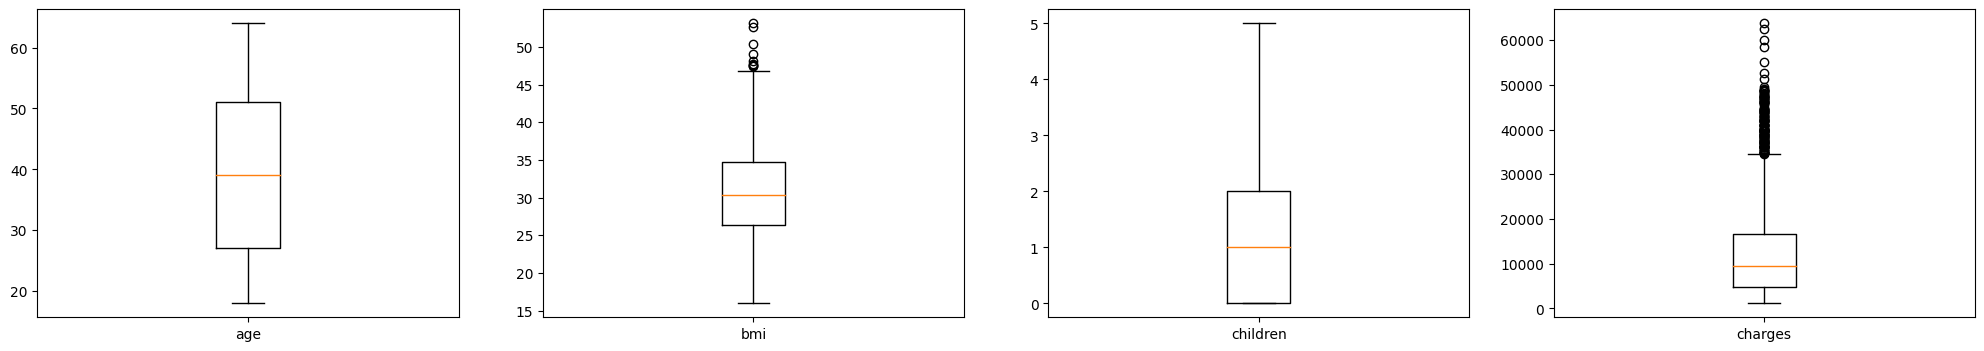

In [12]:
#Generar histogramas de las variables numéricas
insurance_df.hist(figsize=(25,4), layout=(1,5))
#Generar grafico boxplot de las variables numéricas
fig, axes = plt.subplots(1,4, figsize=(25,4))
axes = axes.ravel()
for col, ax in zip(insurance_df[num_cols], axes):
  ax.boxplot(insurance_df[col].dropna(), labels=[f'{col}'])
plt.show()

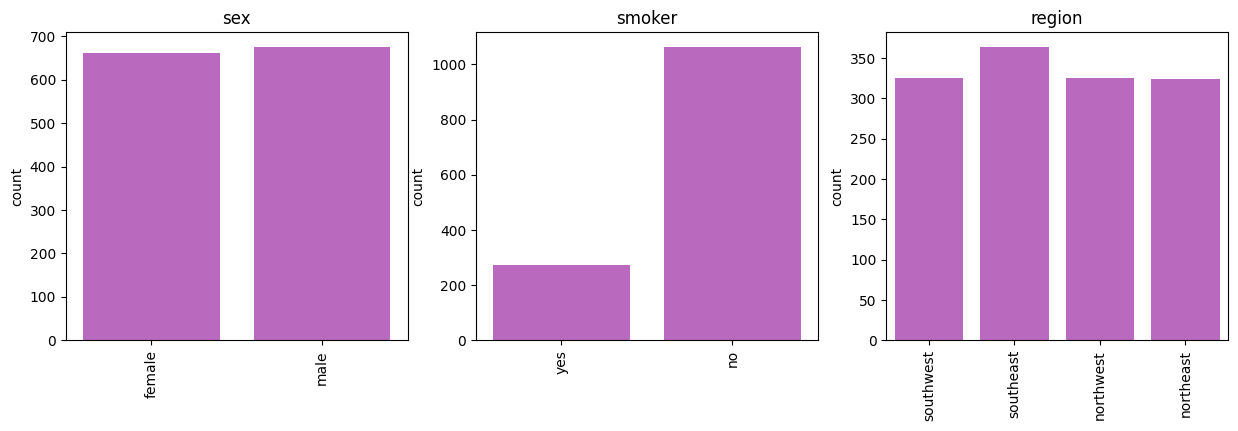

In [13]:
#Generacion de gráficos de variables categóricas
fig, axes = plt.subplots(1,3, figsize=(15,4))
axes = axes.ravel()
for col, ax in zip(insurance_df[cat_cols], axes):
  sns.countplot(x=insurance_df[col], ax=ax, color='#C55CCC')
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

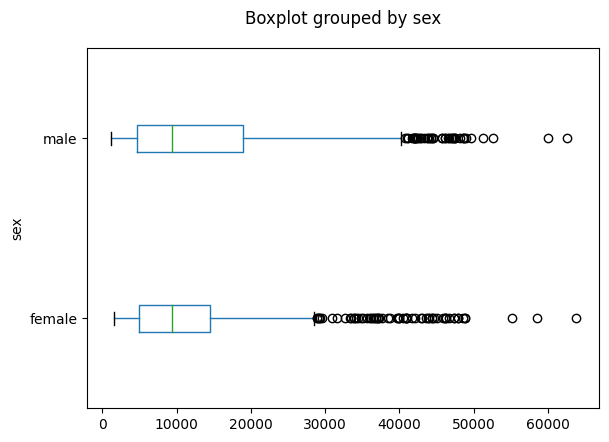

In [14]:
graf = insurance_df.boxplot(by = 'sex',
           column = ['charges'],
           grid = False, vert=False)
graf.set_title(" ");

Se puede observar que hay más hombres que mujeres que pagan primas sueriores a 3000. Antes de 30000, los comportamientos de primaje para ambos géneros son similares.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

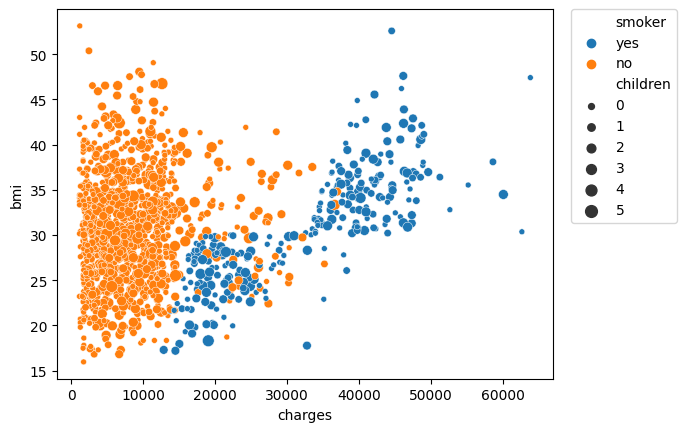

In [15]:
# Diagrama de dispersion de charges vs bmi incorporando categorias de smoker y children
sns.scatterplot(data = insurance_df, x = "charges", y="bmi", hue = "smoker", size = "children")
plt.legend(bbox_to_anchor=(1.25, 1), loc = 'upper right', borderaxespad=0);

No hay diferenciación evidente a partir del número de hijos, más sin embargo se observa una relacón que entre en sus hábitos de fumar con el aumento de ibm sobre la variable charges.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

<ipython-input-16-18b2b89f7ef0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(insurance_df.corr(),2), annot = True)


<Axes: >

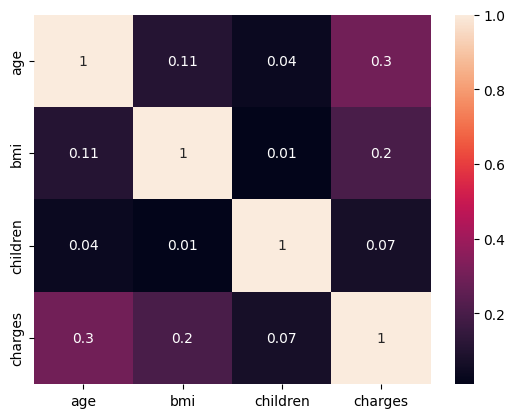

In [16]:
#Análisis bivariado
sns.heatmap(round(insurance_df.corr(),2), annot = True)

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [17]:
from numpy.ma.core import outer
#calcular outtliers de variable charges
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
outliers = insurance_df[(insurance_df['charges'] < lower_limit) | (insurance_df['charges'] > upper_limit)]
outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [18]:
#Promedio de age y de bmi
outliers.describe().loc['mean'][['age','bmi']]

age    41.079137
bmi    35.564604
Name: mean, dtype: float64

3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [19]:
#porcentaje de observaciones que corresponden a mujeres y a hombres
outliers['sex'].value_counts()/len(outliers)

male      0.640288
female    0.359712
Name: sex, dtype: float64

In [20]:
#porcentaje de observaciones que corresponden a fumadores y no fumadores
outliers['smoker'].value_counts()/len(outliers)

yes    0.978417
no     0.021583
Name: smoker, dtype: float64

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [21]:
#Se separan las variables predictoras en X y la variable respuesta en y
predictores = ['age',	'sex',	'bmi',	'children',	'smoker',	'region'	]
X = insurance_df[predictores]
y = insurance_df['charges']
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [22]:
#Se divide el conjunto en entrenamiento y prueba (80:20)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [23]:
#Prepara un transformador para aplicar escalamiento MinMax a los predictores numéricos y codificación one-hot a los categóricas
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))

preprocessing = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))])

In [24]:
#A continación se ven los cambios que produce el pipeline "preprocessing" creado anteriormente
Xtrain_prepared = preprocessing.fit_transform(Xtrain)
Xtrain_prepared_df = pd.DataFrame(Xtrain_prepared, columns=preprocessing.get_feature_names_out(), index=Xtrain.index)
Xtrain_prepared_df

,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northwest,cat__region_southeast,cat__region_southwest
216,0.760870,0.286252,0.0,0.0,0.0,1.0,0.0,0.0
731,0.760870,0.146355,0.2,1.0,0.0,0.0,0.0,1.0
866,0.000000,0.573850,0.0,1.0,0.0,0.0,1.0,0.0
202,0.913043,0.217245,0.0,0.0,0.0,1.0,0.0,0.0
820,0.586957,0.477267,0.2,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
715,0.913043,0.348130,0.0,1.0,0.0,0.0,0.0,1.0
905,0.173913,0.360371,0.4,0.0,0.0,0.0,0.0,0.0
1096,0.717391,0.511165,0.4,0.0,1.0,0.0,0.0,0.0
235,0.478261,0.168415,0.4,0.0,1.0,0.0,1.0,0.0


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [27]:
#Pipeline para la predicción, que incluye el de procesamiento creado anteriormente y la regresión lineal
lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(Xtrain, ytrain)
predictions = lr_model.predict(Xtest)
# Se obtiene la R cuadrada sobre los datos de entrenamiento
r_cuad_train = lr_model.score(Xtest, ytest)

# Se obtiene la R cuadrada sobre los datos de prueba
r_cuad_test = lr_model.score(Xtrain, ytrain)

print('Root Mean Square Error (RMSE):', mean_squared_error(ytest, predictions, squared=False))
print('R square (R2) :', r2_score(ytest, predictions))

print("Calidad de la prediccion train: " + str(r_cuad_train))
print("Calidad de la prediccion test: " + str(r_cuad_test))

Root Mean Square Error (RMSE): 5956.454717976427
R square (R2) : 0.7623311844057112
Calidad de la prediccion train: 0.7623311844057112
Calidad de la prediccion test: 0.7477680686451551


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [29]:
# Se hace una copia de la columna 'charges' en la que los outliers de 'charges' se sustituirán
insurance_df['charges_trim'] = insurance_df['charges'].copy()
condicion = (insurance_df['charges'] < lower_limit) | (insurance_df['charges'] > upper_limit)
insurance_df['charges_trim'][condicion] = upper_limit
insurance_df

<ipython-input-29-476421add3cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_df['charges_trim'][condicion] = upper_limit


,age,sex,bmi,children,smoker,region,charges,charges_trim
0,19,female,27.900,0,yes,southwest,16884.92400,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500,2007.94500


In [30]:
y = insurance_df['charges_trim']
# Se construyen las muestras de entranamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = 0.8, random_state = 1)
lr_model2 = make_pipeline(preprocessing, LinearRegression())
lr_model2.fit(Xtrain, ytrain)
predictions = lr_model2.predict(Xtest)
r_cuad_train = lr_model2.score(Xtrain, ytrain)
r_cuad_test = lr_model2.score(Xtest, ytest)

print('Root Mean Square Error (RMSE):', mean_squared_error(ytest, predictions, squared=False))
print('R square (R2) :', r2_score(ytest, predictions))
print("Calidad de la prediccion train: " + str(r_cuad_train))
print("Calidad de la prediccion test: " + str(r_cuad_test))

#lr_model2.fit(Xtrain, ytrain)
#r_cuad_train = lr_model2.score(Xtrain, ytrain)
#r_cuad_test = lr_model2.score(Xtest, ytest)
#print("R cuadrada del entrenamiento " + str(r_cuad_train))
#print("R cuadrada de la prueba " + str(r_cuad_test))

Root Mean Square Error (RMSE): 4913.809383447608
R square (R2) : 0.7611898810108253
Calidad de la prediccion train: 0.7443703861960229
Calidad de la prediccion test: 0.7611898810108253


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [31]:
# Se define el preprocesador ordinal
preprocessing_or = OrdinalEncoder()
preprocessing_sc = StandardScaler()

# Se define el transformador que incluye a ambos preprocesadores
preprocessing2 = ColumnTransformer([("EncOrd", preprocessing_or, ['smoker', 'sex']), ("EscEst", preprocessing_sc, ['age','bmi','children'])])
lr_model3 = make_pipeline(preprocessing2, LinearRegression())
lr_model3.fit(Xtrain, ytrain)
predictions = lr_model3.predict(Xtest)
r_cuad_train = lr_model3.score(Xtrain, ytrain)
r_cuad_test = lr_model3.score(Xtest, ytest)

print('Root Mean Square Error (RMSE):', mean_squared_error(ytest, predictions, squared=False))
print('R square (R2) :', r2_score(ytest, predictions))
print("Calidad de la prediccion train: " + str(r_cuad_train))
print("Calidad de la prediccion test: " + str(r_cuad_test))

Root Mean Square Error (RMSE): 4923.841632848112
R square (R2) : 0.760213755087338
Calidad de la prediccion train: 0.7426807557734111
Calidad de la prediccion test: 0.760213755087338


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [33]:
#Regresión polinomial para reproducir un mejor ajuste
for i in range(2,9):
    print("Grado del polinomio " + str(i))
    preprocessing_poli = PolynomialFeatures(degree = i) # Se define el transformador que incluye los tres preprocesadores
    preprocessing4 = ColumnTransformer([("EncOrd", preprocessing_or, ['smoker', 'sex']), ("EscEst", preprocessing_sc, ['age','bmi','children']), ("Polinom", preprocessing_poli, ['age','bmi','children']) ])
    lr_model4 = make_pipeline(preprocessing4, LinearRegression())
    lr_model4.fit(Xtrain, ytrain)
    r_cuad_train = lr_model4.score(Xtrain, ytrain)
    r_cuad_test = lr_model4.score(Xtest, ytest)
    print("R cuadrada del entrenamiento " + str(r_cuad_train))
    print("R cuadrada de la prueba " + str(r_cuad_test))

Grado del polinomio 2
R cuadrada del entrenamiento 0.7509652157068668
R cuadrada de la prueba 0.7637389109663012
Grado del polinomio 3
R cuadrada del entrenamiento 0.7546638757915441
R cuadrada de la prueba 0.7603599973810359
Grado del polinomio 4
R cuadrada del entrenamiento 0.758081392000138
R cuadrada de la prueba 0.7550181604884314
Grado del polinomio 5
R cuadrada del entrenamiento 0.7635092698611052
R cuadrada de la prueba 0.7547049440173488
Grado del polinomio 6
R cuadrada del entrenamiento 0.7721394524543446
R cuadrada de la prueba 0.7447453706033543
Grado del polinomio 7
R cuadrada del entrenamiento 0.7776352584684485
R cuadrada de la prueba 0.12220626382402733
Grado del polinomio 8
R cuadrada del entrenamiento 0.7864474828741372
R cuadrada de la prueba -26.88165596301159


In [36]:
preproceso_numerico_poli = PolynomialFeatures(degree = 2)
preprocessing3 = ColumnTransformer([("EncOrd", preprocessing_or, ['smoker', 'sex']), ("EscEst", preprocessing_sc, ['age','bmi','children']),("Polinom", preproceso_numerico_poli, ['age','bmi','children'])])
lr_model4 = make_pipeline(preprocessing3, LinearRegression())
lr_model4.fit(Xtrain, ytrain)
predictions = lr_model4.predict(Xtest)
r_cuad_train = lr_model4.score(Xtrain, ytrain)
r_cuad_test = lr_model4.score(Xtest, ytest)
print('Root Mean Square Error (RMSE):', mean_squared_error(ytest, predictions, squared=False))
print('R square (R2) :', r2_score(ytest, predictions))
print("R cuadrada del entrenamiento " + str(r_cuad_train))
print("R cuadrada de la prueba " + str(r_cuad_test))

Root Mean Square Error (RMSE): 4887.514327946557
R square (R2) : 0.7637389109663012
R cuadrada del entrenamiento 0.7509652157068668
R cuadrada de la prueba 0.7637389109663012
